# Exercise Set 12: Linear regression models.

*Afternoon, August 19, 2019*

In this Exercise Set 12 we will work with linear regression models.

We import our standard stuff. Notice that we are not interested in seeing the convergence warning in scikit-learn so we suppress them for now.

In [199]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

## Exercise Section 12.1: Estimating linear models with gradient decent
 
Normally we use OLS to estimate linear models. In this exercise we replace the OLS-estimator with a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. Using our algorithm we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 12.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [10]:
tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


> **Ex. 12.1.1**: Convert non-numeric variables to dummy variables for each category (remember to leave one column out for each catagorical variable, so you have a reference). Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 

>> *Hint*: You might want to use the `get_dummies` method in pandas, with the `drop_first = True` parameter. 

In [143]:
tips_dummies = pd.get_dummies(tips, columns = ['sex', 'smoker', 'day', 'time', 'size'], drop_first = True)
X = tips_dummies.drop('tip', axis = 1)
y = tips_dummies['tip']
tips_dummies.head(10)

,total_bill,tip,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,size_2,size_3,size_4,size_5,size_6
0,16.99,1.01,1,1,0,0,1,1,1,0,0,0,0
1,10.34,1.66,0,1,0,0,1,1,0,1,0,0,0
2,21.01,3.50,0,1,0,0,1,1,0,1,0,0,0
3,23.68,3.31,0,1,0,0,1,1,1,0,0,0,0
4,24.59,3.61,1,1,0,0,1,1,0,0,1,0,0
5,25.29,4.71,0,1,0,0,1,1,0,0,1,0,0
6,8.77,2.00,0,1,0,0,1,1,1,0,0,0,0
7,26.88,3.12,0,1,0,0,1,1,0,0,1,0,0
8,15.04,1.96,0,1,0,0,1,1,1,0,0,0,0
9,14.78,3.23,0,1,0,0,1,1,1,0,0,0,0


> **Ex. 12.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

>> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size = 0.5, 
                     random_state = 0)

> **Ex. 12.1.3**: Normalize your features by converting to zero mean and one std. deviation.

>> *Hint 1*: Take a look at `StandardScaler` in `sklearn.preprocessing`. 

>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [145]:
from sklearn.preprocessing import StandardScaler
#https://sebastianraschka.com/faq/docs/scale-training-test.html
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


> **Ex. 12.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
>> *Hint 1:* You can use the net-input fct. from yesterday.
>>
>> *Hint 2:* If you run the following code,
>> ```python
y__ = np.array([1,1])
X__ = np.array([[1,0],[0,1]])
w__ = np.array([0,1,1])
compute_error(y__, X__, w__)
```

>> then you should get output:
```python 
array([0,0])
```



In [146]:
def net_input(X, w):
    return w[0] + np.dot(X, w[1:])

def predict(X, w):
    return net_input(X, w)

def compute_error(y_, X_, w_):
    return np.where(y_ != predict(X_, w_), 1, 0)

In [147]:
y__ = np.array([1,1])
X__ = np.array([[1,0],[0,1]])
w__ = np.array([0.,1.,1.])
compute_error(y__, X__, w__)

array([0, 0])

> **Ex. 12.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

> **Ex. 12.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X.shape[1])
```

In [202]:
from sklearn.metrics import mean_squared_error

def fit(X_, y_, n_iter, eta):
    w_ = np.zeros(1+X.shape[1]) #initialization of weights
    
    MSEs = [] #To collect mean-squared-errors
    for _ in range(n_iter):
        updates = (y_-(w_[0] + np.dot(X_, w_[1:]))) #updates contains a vector of updates
        w_[1:] += eta * np.dot(X_.T, updates)
        w_[0] += eta * updates.sum()
        
        y_pred = w_[0] + np.dot(X_, w_[1:]) #This is a prediction of all the y's using linear algebra
        MSEs.append(mean_squared_error(y_, y_pred))
        
    return w_, MSEs


> **Ex. 12.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

>> Hint: You can use the following code to check that your model works:
>>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

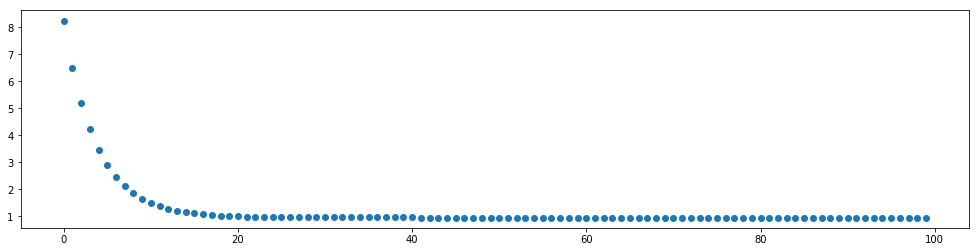

In [197]:
w, MSEs = fit(X_train_std, y_train, 100, 0.001)
fig, ax = plt.subplots(figsize = (17,4))
ax.scatter(x = range(len(MSEs)), y = MSEs, label = 'MSEs')
plt.show()

The following bonus exercises are for those who have completed all other exercises until now and have a deep motivation for learning more.

> **Ex. 12.1.8 (BONUS)**: Implement your linear regression model as a class.

> **Ex. 12.1.9 (BONUS)**: Is it possible to adjust our linear model to become a Lasso? Is there a simple fix?

## Exercise Section 12.2: Houseprices
In this example we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle is an organization that hosts competitions in building predictive models.

> **Ex. 12.2.0:** Load the california housing data with scikit-learn using the code below. Inspect the data set. 

In [222]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467




> **Ex.12.2.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? 

> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  

>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`

>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [220]:
from sklearn.preprocessing import PolynomialFeatures
X_p = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X_train)
print('Amount of variables: {}'.format(len(X_p[0])))

Amount of variables: 83


> **Ex.12.2.2**: Estimate the Lasso model on the train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the test and train data. 

> *Hint*: use `logspace` in numpy to create the range.


In [244]:
from sklearn.linear_model import Lasso
rng = np.logspace(-6, 6, base = 10)
train_RMSE = []
test_RMSE = []
for lmbd in rng:
    lasso = Lasso(lmbd)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    train_RMSE.append(mean_squared_error(y_train, 
                                         y_train_pred)**(1/2))
    test_RMSE.append(mean_squared_error(y_test, 
                                         y_test_pred)**(1/2))

> **Ex.12.2.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

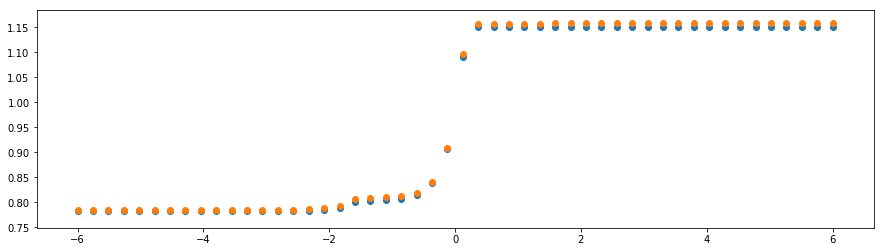

In [245]:
fig, ax = plt.subplots(figsize = (15, 4))
ax.scatter(x = np.log10(rng), y = train_RMSE, label = 'Train RMSE')
ax.scatter(x = np.log10(rng), y = test_RMSE, label = 'Test RMSE')
plt.show()

In [246]:
pos = np.argmin(test_RMSE)
print('Lambda minimizing RMSE: {}'.format(rng[pos]))

Lambda minimizing RMSE: 1e-06
